In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
# importing the dataset

data  = pd.read_csv(r'clevelanda.csv')

In [7]:
# Understanding the dataset
data.head()

# Checking for null values
data.isnull().sum()  

data.columns

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fps', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'class'],
      dtype='object')

### 🫀 Cleveland Heart Disease Dataset — Column Descriptions

The table below explains each column in the dataset:

| Column     | Description |
|------------|-------------|
| **age**        | Age of the patient (in years). |
| **gender**        | Gender of the patient: `0` = female, `1` = male. |
| **cp**         | Chest pain type (ordinal): <br> - `0`: Typical angina (	Chest pain related to decreased blood supply to the heart. Usually triggered by exertion or stress.) <br> - `1`: Atypical angina (Chest pain not typical for angina; may not be related to heart disease.)<br> - `2`: Non-anginal pain (Chest pain not related to heart issues (e.g., muscular or gastrointestinal).) <br> - `3`: Asymptomatic (No chest pain at all. Often found through other tests; surprisingly common in serious cases.)|
| **trestbps**   | Resting blood pressure (in mm Hg) on admission to the hospital. |
| **chol**       | Serum cholesterol level (in mg/dl). (Higher value can indicate risk of heart condition)|
| **fbs**        | Fasting blood sugar > 120 mg/dl: <br> - `1` = True <br> - `0` = False |
| **restecg**    | Resting electrocardiographic results: <br> - `0`: Normal <br> - `1`: ST-T wave abnormality <br> - `2`: Left ventricular hypertrophy |
| **thalach**    | Maximum heart rate achieved during a stress test. |
| **exang**      | Exercise-induced angina: <br> - `1` = Yes (felt chest pain during a stress test suggest heart condition) <br> - `0` = No (No pain during test relatively better) |
| **oldpeak**    | ST depression induced by exercise relative to rest. oldpeak = 0: No depression — normal. <br> Oldpeak > 0 (greater value  greater risk of coronary artery disease)|
| **slope**      | Slope of the peak exercise ST segment: <br> - `0`: Upsloping (normal) <br> - `1`: Flat (may indicate ischemia) <br> - `2`: Downsloping (Strongest indication of heart abnormality) |
| **ca**         | Number of major vessels (0–3) colored by fluoroscopy. <br> **ca = 0** (good sign) <br> **ca=3**(All major vessels have issues, critical condition) <br> Higer value of ca directly related to heart disease|
| **thal**       | Type of thalassemia: <br> - `1`: Fixed defect (Suggests old myocardial infarction (scar tissue) — no change in blood flow between rest and stress) <br> - `2`: Normal (Normal blood flow during rest and stress) <br> - `3`: Reversible defect (Indicates possible ischemia — blood flow is reduced during stress but normal at rest) <br> |
| **class**     | Presence of heart disease: <br> - `0`: No disease <br> - `>=1`: Disease present, greter the number higher the severity. |


In [8]:
data

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [75]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [76]:
print(data.shape)

(303, 14)


In [77]:
# Getting number of males and females 0 - F, 1 - M

pd.value_counts(data['sex'])

n_females = data[data['sex']==0].shape[0]
n_males = data[data['sex']==1].shape[0]

print(f"Number of females: {n_females}")
print(f"Number of males: {n_males}")



Number of females: 97
Number of males: 206


Data is clean and ready to analyse. 

In [78]:
# Getting the number of patients (males and females) with heart disease and without heart disease 

n_patients = data.shape[0]
n_male_patients = data[(data['target'] == 1) & (data['sex']==1)].shape[0]
n_female_patients = data[(data['target'] == 1) & (data['sex']==0)].shape[0]

print(f"Number of female patients: {n_female_patients}")
print(f"Number of make patients: {n_male_patients}")


Number of female patients: 25
Number of make patients: 114


([<matplotlib.axis.XTick at 0x7b8fb869c7d0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

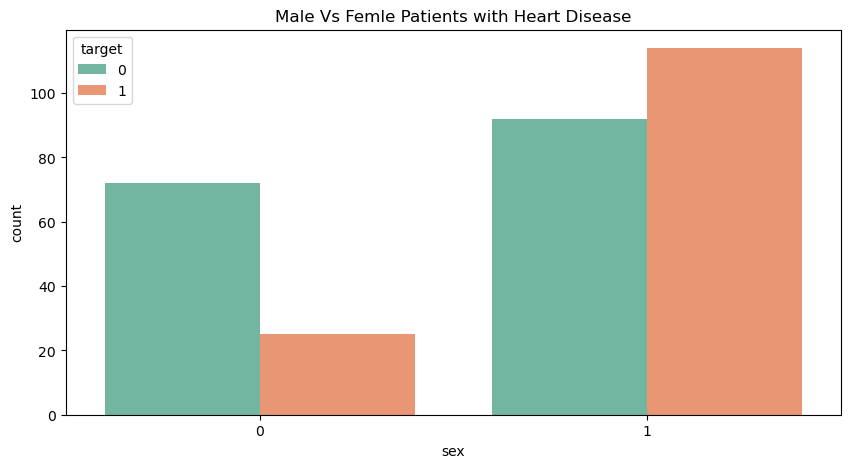

In [ ]:
# ploting the males and females with heart disease and without heart disease
plt.figure(figsize=(10, 5))

sns.countplot(data = data, x='sex', hue='target', palette='Set2') 
plt.title('Male Vs Femle Patients with Heart Disease')

plt.xticks([0, 1])